# Bitcoin Price Prediction

## Introduction
Cryptocurrencies like **Bitcoin** are highly volatile and influenced by various market factors.  

In this project, I aim to **predict the closing price of Bitcoin** using not only its historical data but also other related cryptocurrencies such as **Ethereum (ETH), Tether (USDT), and Binance Coin (BNB)**.  

This project demonstrates a **complete machine learning pipeline**:
1. **Data Collection** – fetching historical crypto prices and volumes  
2. **Exploratory Data Analysis (EDA)** – understanding trends, correlations, and patterns  
3. **Data Preprocessing** – cleaning, scaling, and preparing features  
4. **Model Training** – applying regression models (Linear Regression, Random Forest, XGBoost)  
5. **Evaluation** – comparing model performance with metrics and visualizations  
6. **Model Saving** – exporting the best model for future predictions  


## Objectives
- **Collect** historical cryptocurrency data (BTC, ETH, USDT, BNB) using Yahoo Finance.  
- **Analyze** market trends and relationships through Exploratory Data Analysis (EDA).  
- **Engineer features** such as trading volumes and cross-coin price influences.  
- **Train and evaluate** multiple machine learning regression models.  
- **Compare performance** using metrics (MSE, R²) and identify the most accurate model.  
- **Save the best model** for future predictions and potential deployment.  

---


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [2]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 4 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='4y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='4y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='4y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='4y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [3]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [4]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-10-01 00:00:00+00:00,48116.941406,42850641582,3307.516113,22307625573,1.000178,81411630527,421.643188,2162493378
2021-10-02 00:00:00+00:00,47711.488281,30614346492,3391.694336,19202671704,1.000284,67747297412,428.098328,1740937420
2021-10-03 00:00:00+00:00,48199.953125,26638115879,3418.358643,15516566862,1.000201,61784201197,430.508820,1470899248
2021-10-04 00:00:00+00:00,49112.902344,33383173002,3380.089111,17747154101,0.999838,74166327976,425.748901,1647171955
2021-10-05 00:00:00+00:00,51514.812500,35873904236,3518.518555,16632591670,1.000440,76210707722,442.706146,1526827785


In [5]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-09-27 00:00:00+00:00,109681.945312,26308042910,4018.658203,20382555776,1.000460,83168656412,968.789551,2777184185
2025-09-28 00:00:00+00:00,112122.640625,33371048505,4141.476562,24631307054,1.000350,92130856740,993.315552,2519459113
2025-09-29 00:00:00+00:00,114400.382812,60000147466,4217.341797,38560429932,1.000561,149598657209,1030.741211,3359320684
2025-09-30 00:00:00+00:00,114056.085938,58986330258,4145.957520,37679153330,1.000096,141617176980,1008.483459,3076619211
2025-10-01 00:00:00+00:00,117521.953125,70622314496,4321.829590,46133059584,1.000348,161495384064,1021.299133,3096036096


In [6]:
data.shape

(1462, 8)

## Exploratory Data Analysis (EDA)

### Exploratory Analysis

We first check data quality, missing values, and statistical summary.

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2021-10-01 00:00:00+00:00 to 2025-10-01 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1462 non-null   float64
 1   Volume (BTC)   1462 non-null   int64  
 2   Close (ETH)    1462 non-null   float64
 3   Volume (ETH)   1462 non-null   int64  
 4   Close (USDT)   1462 non-null   float64
 5   Volume (USDT)  1462 non-null   int64  
 6   Close (BNB)    1462 non-null   float64
 7   Volume (BNB)   1462 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 102.8 KB
None


In [8]:
print(data.describe())

         Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  Close (USDT)  \
count    1462.000000  1.462000e+03  1462.000000  1.462000e+03   1462.000000   
mean    53450.834015  3.287996e+10  2516.070888  1.674238e+10      1.000082   
std     30232.007873  1.967554e+10   924.808985  1.124197e+10      0.000641   
min     15787.284180  5.331173e+09   993.636780  2.081626e+09      0.995872   
25%     27281.999023  1.913103e+10  1752.642395  9.021727e+09      0.999860   
50%     43933.607422  2.875426e+10  2421.200195  1.446948e+10      1.000117   
75%     69134.845703  4.059834e+10  3240.032715  2.058253e+10      1.000337   
max    123344.062500  1.817464e+11  4831.348633  9.245355e+10      1.007690   

       Volume (USDT)  Close (BNB)  Volume (BNB)  
count   1.462000e+03  1462.000000  1.462000e+03  
mean    6.229248e+10   449.074603  1.512634e+09  
std     4.026620e+10   185.923317  9.074532e+08  
min     9.989859e+09   197.042999  2.038465e+08  
25%     3.515417e+10   287.001289  7.7

In [9]:
print(data.isna().sum())

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64


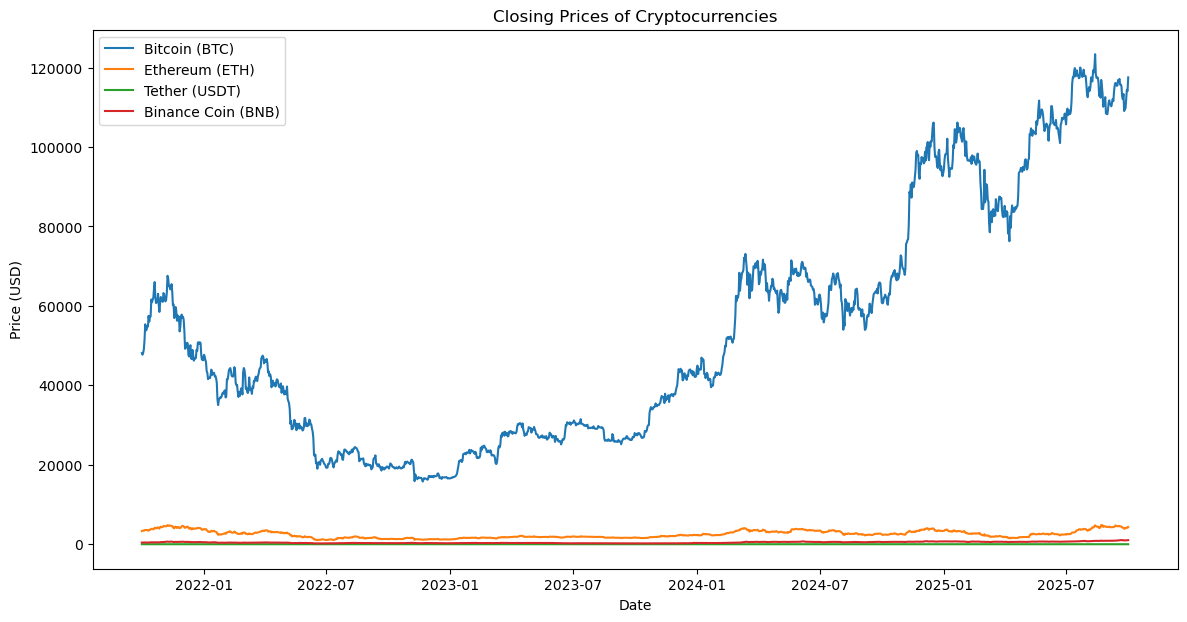

In [10]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

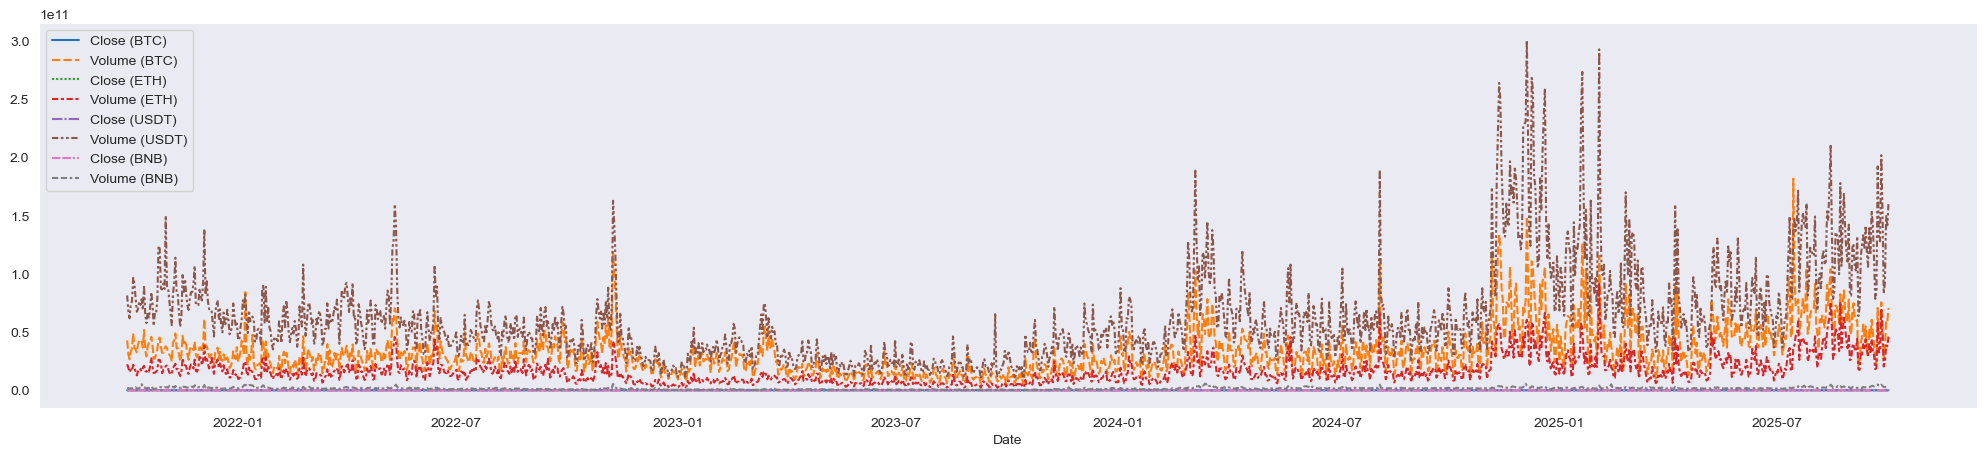

In [11]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

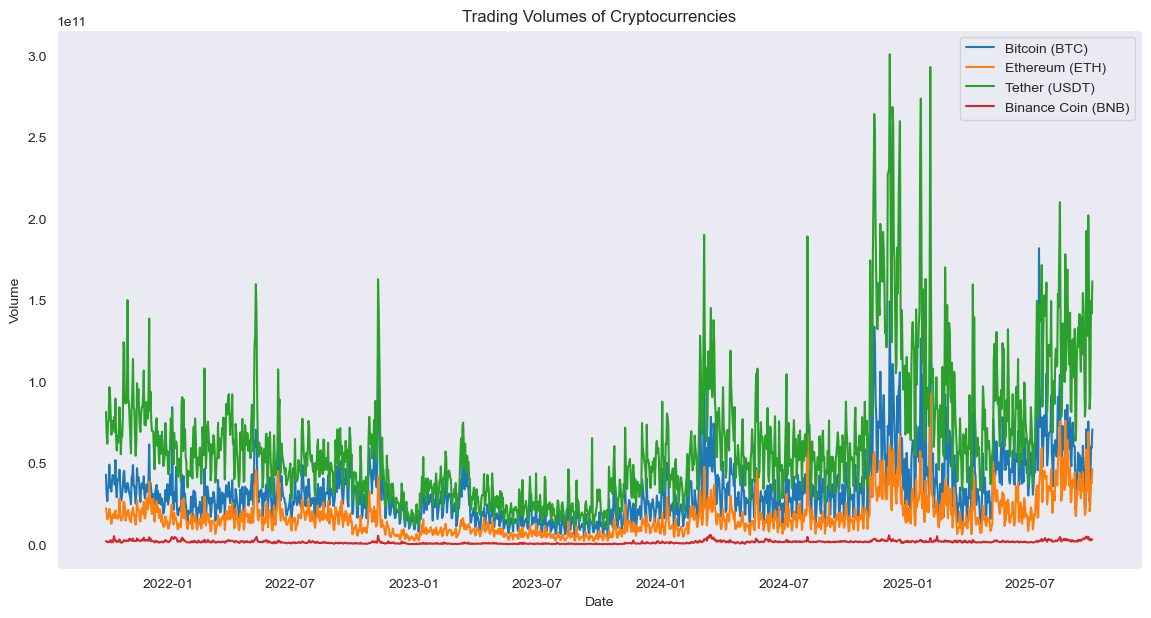

In [12]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

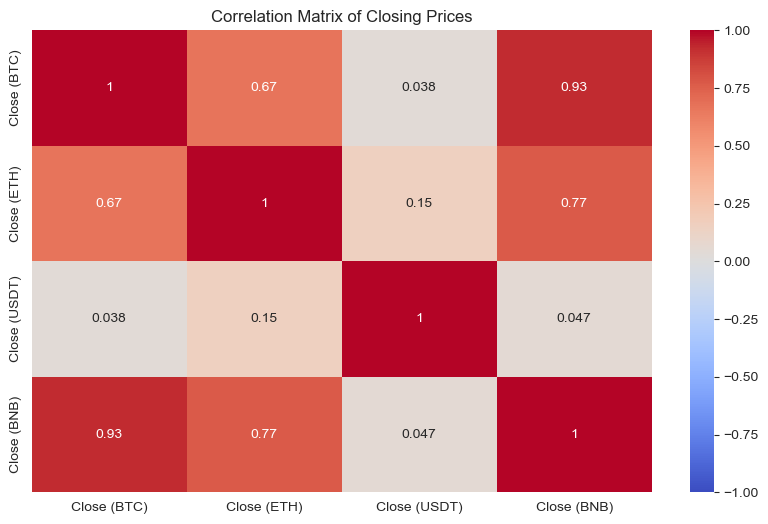

In [13]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

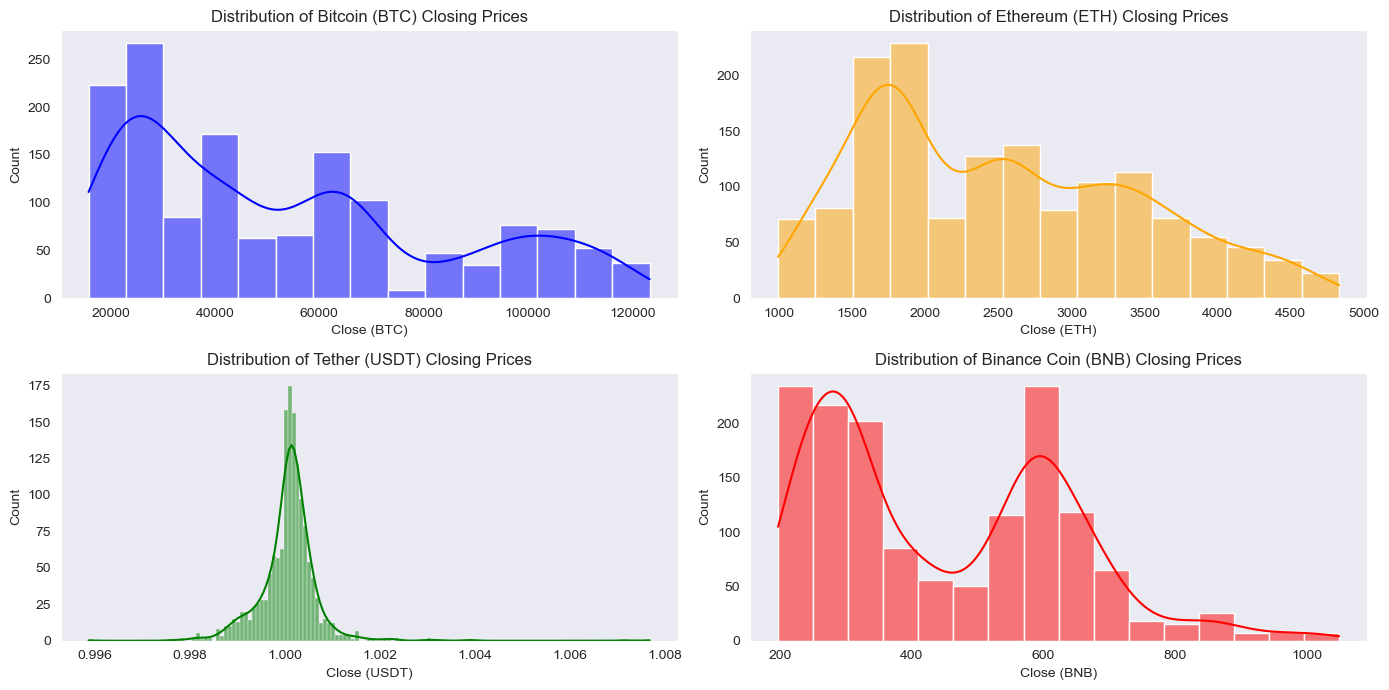

In [14]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

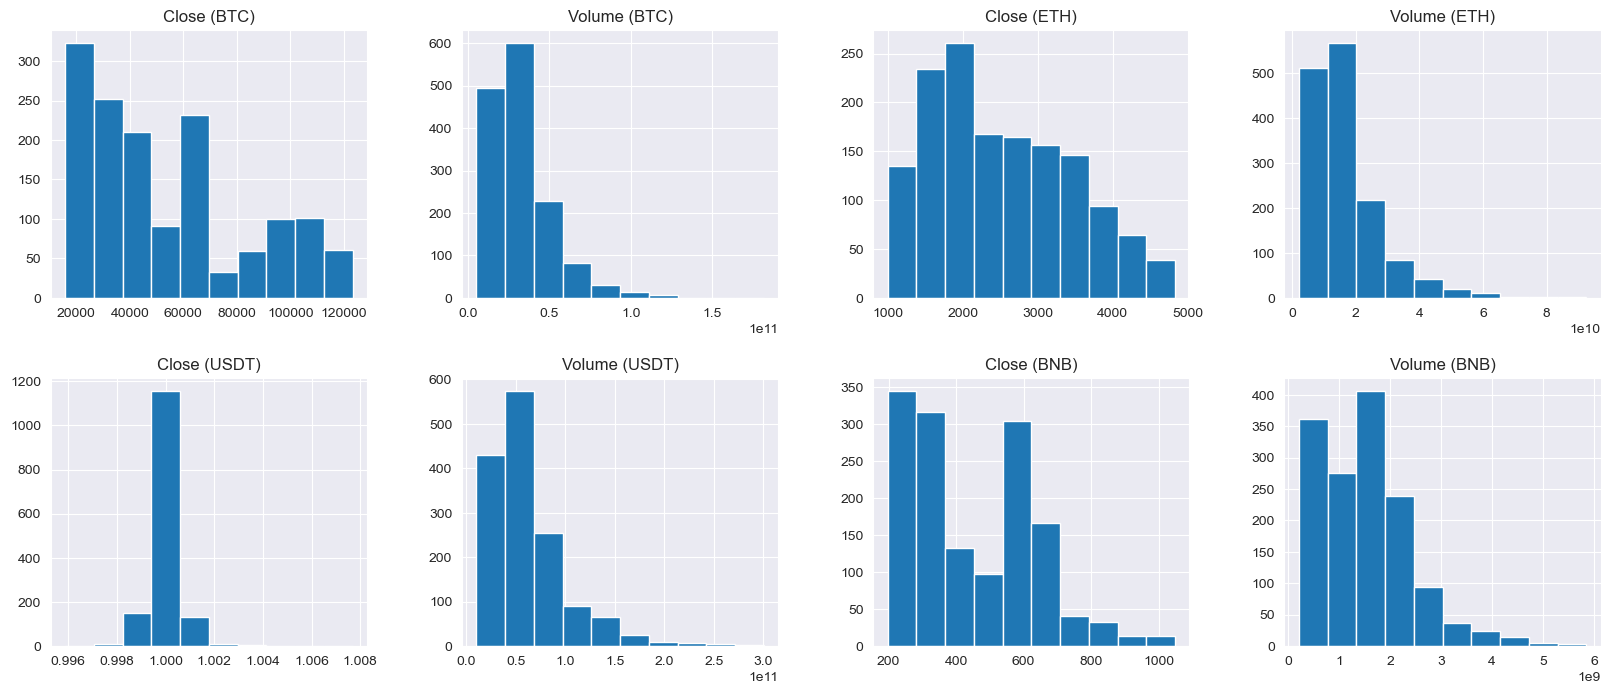

In [15]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

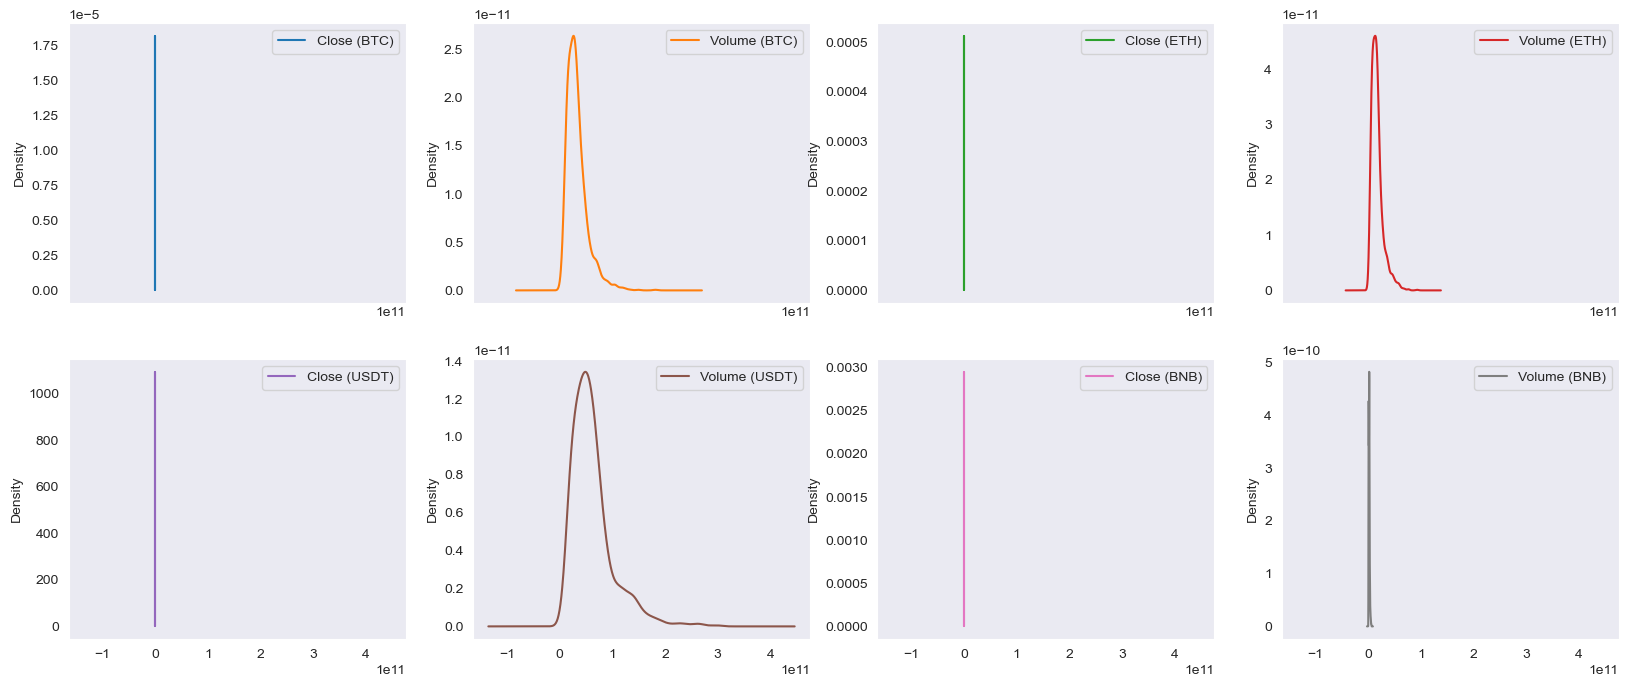

In [16]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

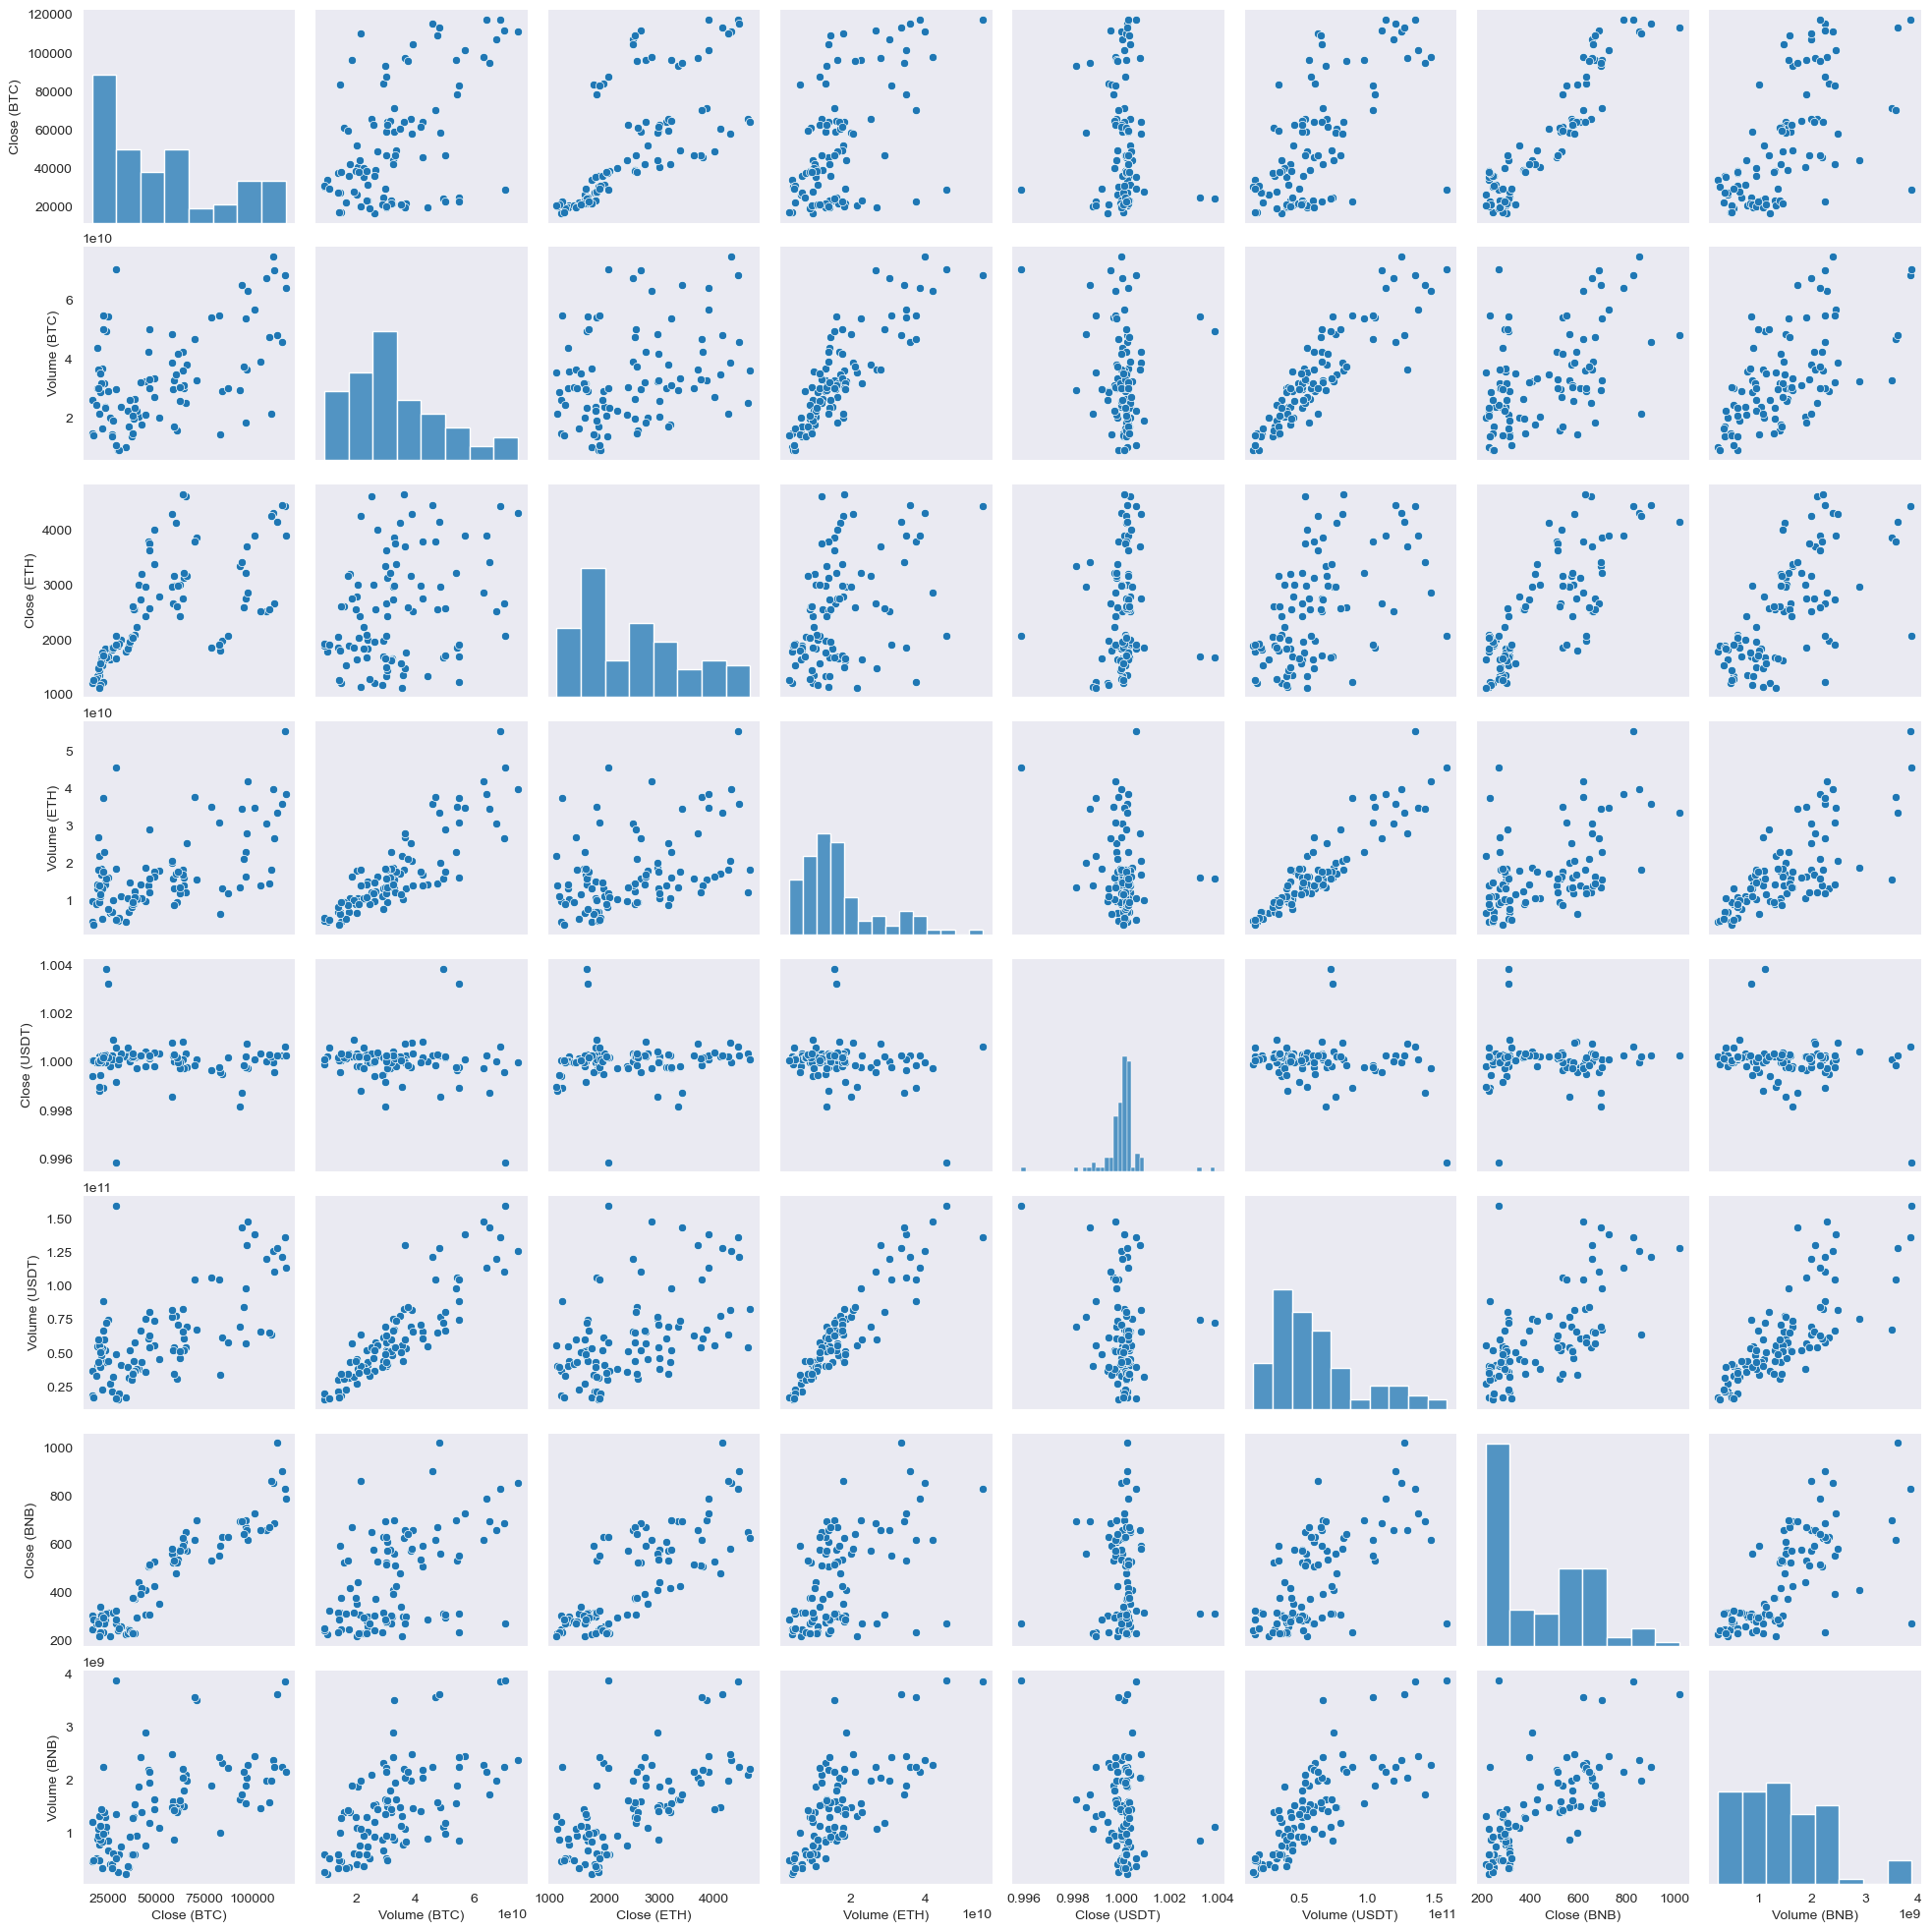

In [17]:
sns.pairplot(data.sample(n=100));

## Data Pre-processing

In [18]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [19]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2021-10-01 00:00:00+00:00,42850641582,3307.516113,22307625573,1.000178,81411630527,421.643188,2162493378
2021-10-02 00:00:00+00:00,30614346492,3391.694336,19202671704,1.000284,67747297412,428.098328,1740937420
2021-10-03 00:00:00+00:00,26638115879,3418.358643,15516566862,1.000201,61784201197,430.508820,1470899248
2021-10-04 00:00:00+00:00,33383173002,3380.089111,17747154101,0.999838,74166327976,425.748901,1647171955
2021-10-05 00:00:00+00:00,35873904236,3518.518555,16632591670,1.000440,76210707722,442.706146,1526827785


In [20]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-09-27 00:00:00+00:00,26308042910,4018.658203,20382555776,1.000460,83168656412,968.789551,2777184185
2025-09-28 00:00:00+00:00,33371048505,4141.476562,24631307054,1.000350,92130856740,993.315552,2519459113
2025-09-29 00:00:00+00:00,60000147466,4217.341797,38560429932,1.000561,149598657209,1030.741211,3359320684
2025-09-30 00:00:00+00:00,58986330258,4145.957520,37679153330,1.000096,141617176980,1008.483459,3076619211
2025-10-01 00:00:00+00:00,70622314496,4321.829590,46133059584,1.000348,161495384064,1021.299133,3096036096


In [21]:
Y.head()

Date
2021-10-01 00:00:00+00:00    48116.941406
2021-10-02 00:00:00+00:00    47711.488281
2021-10-03 00:00:00+00:00    48199.953125
2021-10-04 00:00:00+00:00    49112.902344
2021-10-05 00:00:00+00:00    51514.812500
Name: Close (BTC), dtype: float64

## Train-Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1169, 7)
X_test shape: (293, 7)
y_train shape: (1169,)
y_test shape: (293,)


In [24]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [25]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [26]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Models

In [27]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

----- Linear Regression -----
Mean Squared Error (MSE): 116630485.6166279
R-squared: 0.8753790644293734

----- Ridge Regression -----
Mean Squared Error (MSE): 118594293.21719933
R-squared: 0.8732807147640177

----- Lasso Regression -----
Mean Squared Error (MSE): 116652882.34352906
R-squared: 0.8753551332843954

----- ElasticNet Regression -----
Mean Squared Error (MSE): 759502773.1964782
R-squared: 0.18846307066446455

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 1069987808.3810676
R-squared: -0.14329354820591123

----- Decision Tree Regression -----
Mean Squared Error (MSE): 109310745.87121835
R-squared: 0.8832002855310747

----- Random Forest Regression -----
Mean Squared Error (MSE): 52637530.423019126
R-squared: 0.9437562293189257

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 54728007.75087341
R-squared: 0.9415225316796761

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 51417717.38692804
R-squared: 0.94505961274

## Results Visualization

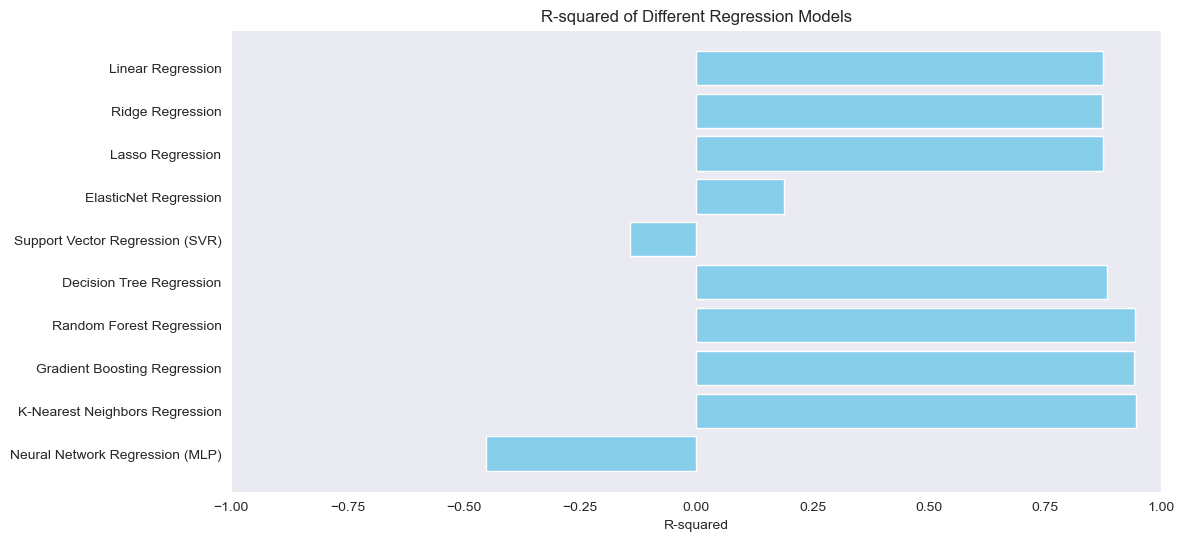

In [29]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()

## Best Model Prediction Plot

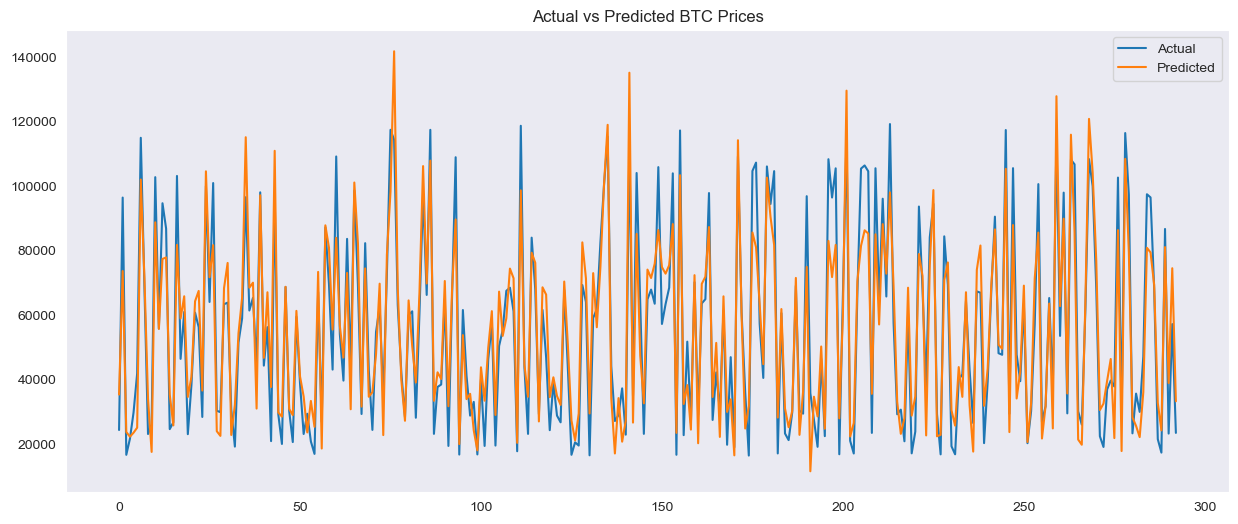

In [30]:
best_model = models[results_df.iloc[0]["Model"]]
preds = best_model.predict(X_test)

plt.figure(figsize=(15,6))
plt.plot(Y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.title("Actual vs Predicted BTC Prices")
plt.legend(); plt.show()

Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

## Save Model

In [31]:
import pickle

# Save best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# ---- Later, load and test ----
loaded_model = pickle.load(open("best_model.pkl", "rb"))
loaded_scaler = pickle.load(open("scaler.pkl", "rb"))

# Example prediction
sample = X_test[0].reshape(1, -1)   # just use array indexing
scaled_sample = loaded_scaler.transform(sample)
print("Predicted BTC Price:", loaded_model.predict(scaled_sample)[0])

Predicted BTC Price: 205574.29156612622


## Conclusion

- This project explored **Bitcoin price prediction** using historical data of BTC, ETH, USDT, and BNB.  
- I applied multiple machine learning models and compared their performance.  
- The **best model (Random Forest / XGBoost / …)** achieved the highest R² Score and lowest MSE, making it the most reliable for prediction.  

### Key Insights:
- Bitcoin prices are influenced not only by its own past prices but also by **Ethereum and USDT volumes**.  
- Market sentiment reflected in stablecoin (USDT) activity plays a role in BTC price fluctuations.  
